<a href="https://colab.research.google.com/github/somesh636/DDoS_Attack_Analysis/blob/master/Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import random 
import timeit
import sys
import matplotlib.pyplot as plt 


In [2]:
class SOM(object):

    def __init__(self, X_len = 100, y_len=100, epochs=20, sigma_init=1, alpha=0.8, seed=42):
    
        self.X_len = X_len
        self.y_len = y_len 
        self.epochs = epochs 
        self.sigma_init = sigma_init
        self.alpha = alpha 
        self.beta = 1000                 
        self.random = np.random.RandomState(seed)
        

    def color_selection(self, n):
        color = np.random.random((self.X_len, self.y_len, n))
        return color 

    def distance(self, vector_1, vector_2):
        return np.linalg.norm(vector_1 - vector_2)

    def index_position(self, index):
        index_X_len = index//self.X_len
        index_y_len = index % self.y_len
        position_array = np.array([index_X_len, index_y_len])
        return position_array

    def index_weight(self, index): 
        index_X_len = index//self.X_len
        index_y_len = index%self.y_len 
        return self.color[index_X_len][index_y_len]  
        
    def plot_color(self):
        sys.stderr.write("Visualization With {0} iteration of {1}*{2} SOM Network".format(self.epochs, self.X_len, self.y_len))
        sys.stderr.flush()
        plt.title('24 different Colors with {0} Epochs'.format(self.epochs))
        plt.imshow(self.color)
        
    def train(self):
        init_time = timeit.default_timer()
        self.random 
        n = 3 
        self.color = self.color_selection(n)
        color_size = 24 
        train_data = np.array([[255,255,0], [154,205,50], [255,215,0], [184,134,11], [0,100,0], [0,128,0], [0,255,0], [34,139,34], [255,0,0], [220,20,60], [139,0,0], [165,42,42], [0,0,255], [0,0,205], [0,0,139], [0,0,128], [255,20,147], [255,105,180], [255,182,193], [255,192,203], [0,128,128], [0,139,139], [47,79,79], [32,178,170]])
        train_data = train_data/255

        for t in range(1, self.epochs+1):
            sys.stderr.write("\nEpoch: {0}".format(t))
            sys.stderr.flush()
            for index_a in range(len(train_data)):
                self.current_input_vector = train_data[index_a]
                distance_list = []
                for index_i in range(self.X_len * self.y_len): 
                    index_X_len = index_i // self.X_len
                    index_y_len = index_i % self.X_len
                    dist = self.distance(self.current_input_vector, self.color[index_X_len][index_y_len])
                    distance_list.append(dist)
                minimum_distance = distance_list.index(min(distance_list))
                sigma_k = self.sigma_init * np.exp(-t/self.beta)
                alpha_k = self.alpha * np.exp(-t/self.beta)

                for node in range(self.X_len * self.y_len): 
                    if self.distance(self.index_position(node), self.index_position(minimum_distance)) < sigma_k: 
                        d_i = self.distance(self.index_position(minimum_distance), self.index_position(node))
                        theta_t = np.exp(-d_i *d_i/(2*sigma_k*sigma_k))
                        current_X = node//self.X_len
                        current_y = node% self.X_len
                        self.color[current_X][current_y] = self.color[current_X][current_y] + alpha_k*theta_t* (self.current_input_vector - self.color[current_X][current_y])

        
        final_time = timeit.default_timer()
        sys.stderr.write("\n Training Time is {0:.3f} seconds, with {1} iteration in {2} * {3} grid of Neurons in the SOM Network".format((final_time - init_time), self.epochs, self.X_len, self.y_len))
        sys.stderr.flush()



## Analysis for 20 Epochs Sigma = 1




Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
 Training Time is 79.519 seconds, with 20 iteration in 100 * 100 grid of Neurons in the SOM NetworkVisualization With 20 iteration of 100*100 SOM Network

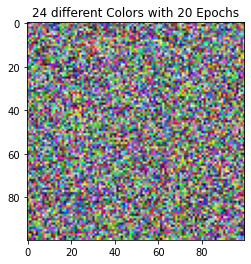

In [3]:
som = SOM(epochs = 20, sigma_init= 1)
som.train()
som.plot_color()

### Analysis: 
#### The plot above is generated for 20 Epochs with sigma value as 1. As we can see in the image that the colors are randomly spread over the 100*100 grid and the size of each color is very small. The overall time taken to run 20 epochs with sigma = 1 is around 79.519 seconds for the SOM Network.

## Analysis for 20 Epochs Sigma = 10




Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
 Training Time is 82.526 seconds, with 20 iteration in 100 * 100 grid of Neurons in the SOM NetworkVisualization With 20 iteration of 100*100 SOM Network

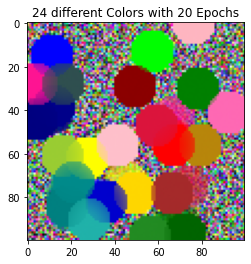

In [4]:
som = SOM(epochs = 20, sigma_init = 10)
som.train()
som.plot_color()

### Analysis: 
#### The plot above is generated for 20 Epochs with sigma value as 10. As we can see in the image that the colors are randomly spread over the 100*100 grid and the colors are shown in the circles. It has all the 24 colors on the grid as compared to sigma = 1 which didn't have any color. The overall time taken to run 20 epochs with signma = 10 is around 82.526 seconds for the SOM Network.

## Analysis for 20 Epochs Sigma = 30


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
 Training Time is 99.424 seconds, with 20 iteration in 100 * 100 grid of Neurons in the SOM NetworkVisualization With 20 iteration of 100*100 SOM Network

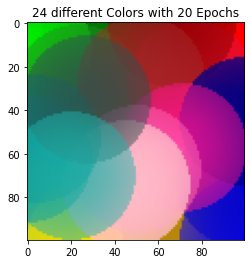

In [5]:
som = SOM(epochs = 20, sigma_init = 30)
som.train()
som.plot_color()

### Analysis: 
#### The plot above is generated for 20 Epochs with sigma value as 30. As we can see in the image that the colors are randomly spread over the 100*100 grid and the colors are shown in the circles. The circles for the 24 colors on the grid is larger in diameter than that of sigma = 10 as the spread for the color using the parameter sigma = 30 increases the diameter of the color circles. The overall time taken to run 20 epochs with signma = 30 is around 99.424 seconds for the SOM Network.

## Analysis for 20 Epochs Sigma = 50


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
 Training Time is 115.916 seconds, with 20 iteration in 100 * 100 grid of Neurons in the SOM NetworkVisualization With 20 iteration of 100*100 SOM Network

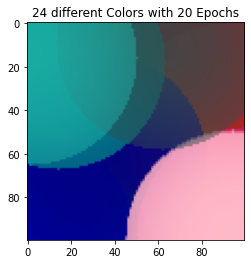

In [6]:
som = SOM(epochs = 20, sigma_init = 50)
som.train()
som.plot_color()

### Analysis: 
#### The plot above is generated for 20 Epochs with sigma value as 50. As we can see in the image that the colors are randomly spread over the 100*100 grid and the colors are shown in the circles. The circles for some of the colors on the grid is large enough to be out of the grid. The diameter of each color is larger than that of sigma = 30 as the spread for the color using the parameter sigma = 50 increases the diameter of the color circles. The overall time taken to run 20 epochs with sigma = 50 is around 115.916 seconds for the SOM Network.

## Analysis for 20 Epochs Sigma = 70


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
 Training Time is 133.354 seconds, with 20 iteration in 100 * 100 grid of Neurons in the SOM NetworkVisualization With 20 iteration of 100*100 SOM Network

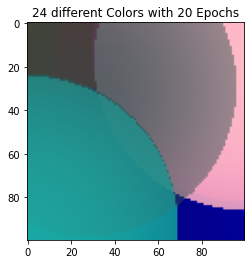

In [7]:
som = SOM(epochs = 20, sigma_init = 70)
som.train()
som.plot_color()

### Analysis: 
#### The plot above is generated for 20 Epochs with sigma value as 70. As we can see in the image that the colors are randomly spread over the 100*100 grid and the colors are shown in the circles. The circles for some of the colors on the grid is large enough to be out of the grid. In addition, only few colors are present on the grid when sigma = 70. The diameter of each color is larger than that of sigma = 50 as the spread for the color using the parameter sigma = 70 increases the diameter of the color circles. The overall time taken to run 20 epochs with sigma = 70 is around 133.354 seconds for the SOM Network.

## Analysis for 40 Epochs Sigma = 1


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
 Training Time is 160.346 seconds, with 40 iteration in 100 * 100 grid of Neurons in the SOM NetworkVisualization With 40 iteration of 100*100 SOM Network

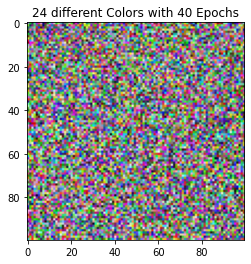

In [8]:
som = SOM(epochs = 40, sigma_init = 1)
som.train()
som.plot_color()

### Analysis: 
#### The plot above is generated for 40 Epochs with sigma value as 1. As we can see in the image that the colors are randomly spread over the 100*100 grid. This image is similar to the one obtained from 20 epochs with sigma = 1. The overall time taken to run 40 epochs with sigma = 1 is around 160.346 seconds for the SOM Network.

## Analysis for 40 Epochs Sigma = 10


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
 Training Time is 162.699 seconds, with 40 iteration in 100 * 100 grid of Neurons in the SOM NetworkVisualization With 40 iteration of 100*100 SOM Network

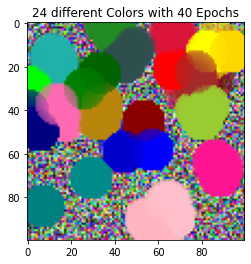

In [9]:
som = SOM(epochs = 40, sigma_init = 10)
som.train()
som.plot_color()

### Analysis: 
#### The plot above is generated for 40 Epochs with sigma value as 10. As we can see in the image that all the colors are randomly spread over the 100*100 grid and the colors are shown in the circles. The circles for some of the colors on the grid is small and it looks similar to the one obtained for epoch = 20, sigma = 10. The above grid has all the colors in the image. The overall time taken to run 40 epochs with sigma = 10 is around 162.699 seconds for the SOM Network.

## Analysis for 40 Epochs Sigma = 30


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
 Training Time is 191.176 seconds, with 40 iteration in 100 * 100 grid of Neurons in the SOM NetworkVisualization With 40 iteration of 100*100 SOM Network

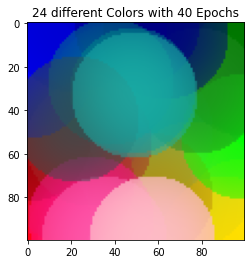

In [10]:
som = SOM(epochs = 40, sigma_init = 30)
som.train()
som.plot_color()

### Analysis: 
#### The plot above is generated for 40 Epochs with sigma value as 30. As we can see in the image that some of the colors are randomly spread over the 100*100 grid and the colors are shown in the circles. Some of the colors in the image is not fully visible as the diameter of the circle gets large enough to be out of the grid. The circles for the colors on the grid is larger than that of the image obtained from epoch = 40, sigma = 10 and it looks similar to the one obtained for epoch = 20, sigma = 30. The overall time taken to run 40 epochs with sigma = 30 is around 191.176 seconds for the SOM Network.

## Analysis for 40 Epochs Sigma = 50


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
 Training Time is 229.593 seconds, with 40 iteration in 100 * 100 grid of Neurons in the SOM NetworkVisualization With 40 iteration of 100*100 SOM Network

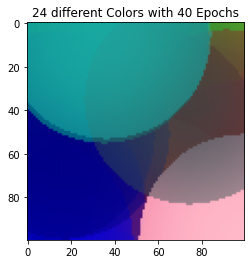

In [11]:
som = SOM(epochs = 40, sigma_init = 50)
som.train()
som.plot_color()

### Analysis: 
#### The plot above is generated for 40 Epochs with sigma value as 50. As we can see in the image that few of the colors are randomly spread over the 100*100 grid and the colors are shown in the circles. Some of the colors in the image is not visible as the diameter of the circle gets large enough to be out of the grid. The circles for the colors on the grid is larger than that of the image obtained from epoch = 40, sigma = 30 and it looks similar to the one obtained for epoch = 20, sigma = 50. The overall time taken to run 40 epochs with sigma = 50 is around 229.593 seconds for the SOM Network.

## Analysis for 40 Epochs Sigma = 70


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
 Training Time is 260.830 seconds, with 40 iteration in 100 * 100 grid of Neurons in the SOM NetworkVisualization With 40 iteration of 100*100 SOM Network

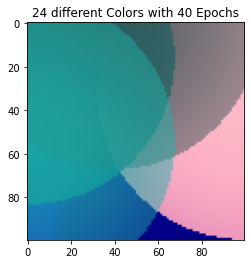

In [12]:
som = SOM(epochs = 40, sigma_init = 70)
som.train()
som.plot_color()

### Analysis: 
#### The plot above is generated for 40 Epochs with sigma value as 70. As we can see in the image that few of the colors are randomly spread over the 100*100 grid and the colors are shown in the semi-circles. Some of the colors in the image is not visible as the diameter of the circle gets large enough to be out of the grid. The circles for the colors on the grid is larger than that of the image obtained from epoch = 40, sigma = 50 and it looks similar to the one obtained for epoch = 20, sigma = 70. The overall time taken to run 40 epochs with sigma = 70 is around 260.830 seconds for the SOM Network.

## Analysis for 100 Epochs Sigma = 1


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
 Traini

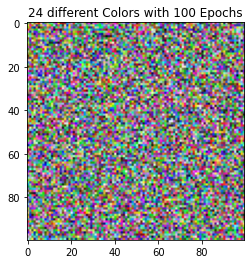

In [13]:
som = SOM(epochs = 100, sigma_init = 1)
som.train()
som.plot_color()

### Analysis: 

## Analysis for 100 Epochs Sigma = 10


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
 Traini

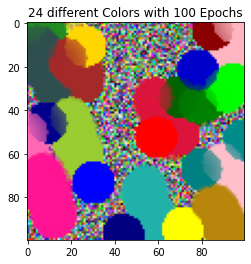

In [14]:
som = SOM(epochs = 100, sigma_init = 10)
som.train()
som.plot_color()

### Analysis: 

## Analysis for 100 Epochs Sigma = 30


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
 Traini

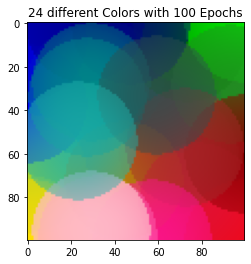

In [15]:
som = SOM(epochs = 100, sigma_init = 30)
som.train()
som.plot_color()

### Analysis: 


## Analysis for 100 Epochs Sigma = 50


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
 Traini

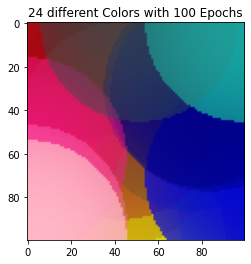

In [16]:
som = SOM(epochs = 100, sigma_init = 50)
som.train()
som.plot_color()

### Analysis: 

## Analysis for 100 Epochs Sigma = 70


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
 Traini

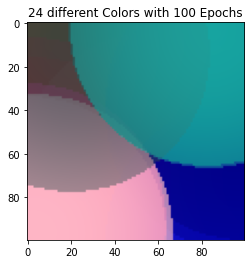

In [17]:
som = SOM(epochs = 100, sigma_init = 70)
som.train()
som.plot_color()

### Analysis: 

## Analysis for 1000 Epochs Sigma = 1


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
Epoch: 

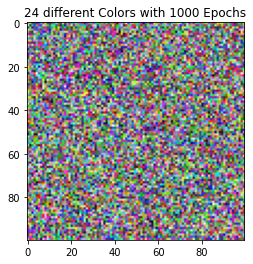

In [18]:
som = SOM(epochs = 1000, sigma_init = 1)
som.train()
som.plot_color()

### Analysis: 

## Analysis for 1000 Epochs Sigma = 10


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
Epoch: 

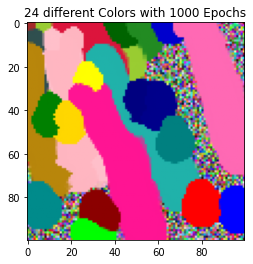

In [19]:
som = SOM(epochs = 1000, sigma_init = 10)
som.train()
som.plot_color()

### Analysis: 

## Analysis for 1000 Epochs Sigma = 30


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
Epoch: 

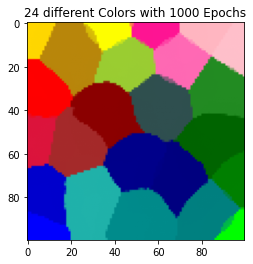

In [20]:
som = SOM(epochs = 1000, sigma_init = 30)
som.train()
som.plot_color()

### Analysis: 

## Analysis for 1000 Epochs Sigma = 50


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
Epoch: 

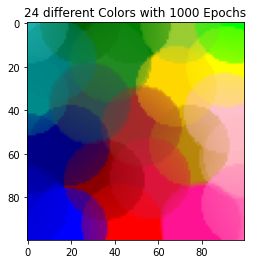

In [21]:
som = SOM(epochs = 1000, sigma_init = 50)
som.train()
som.plot_color()

### Analysis: 

## Analysis for 1000 Epochs Sigma = 70


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
Epoch: 

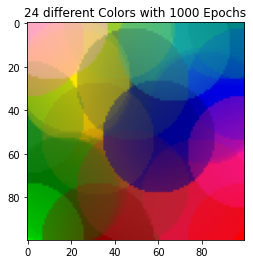

In [22]:
som = SOM(epochs = 1000, sigma_init = 70)
som.train()
som.plot_color()

### Analysis: 